## RAINFALL PREDICTION

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns # for plots


In [2]:
#open csv file
df=pd.read_csv("maduraifinal.csv",header=0)

In [3]:
#Shows the First 5 rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-01-2009,Madurai,13.8,27.4,0.0,9.6,12.6,SSW,56.0,SW,...,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,No,No
1,02-01-2009,Madurai,8.9,24.8,0.0,12.4,13.3,S,39.0,SSE,...,39.0,21.0,1019.8,1017.7,0.0,NaN,14.1,23.3,No,No
2,03-01-2009,Madurai,10.6,28.6,0.0,9.2,13.6,ESE,30.0,E,...,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,No,No
3,04-01-2009,Madurai,13.2,34.5,0.0,8.8,13.5,NNW,26.0,E,...,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,No,No
4,05-01-2009,Madurai,16.5,37.3,0.0,10.4,13.4,WSW,37.0,SSE,...,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,No,No


In [4]:
#Shows the last 5 rows of the dataset
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3004,21-06-2017,Madurai,-0.4,18.3,0.0,0.6,8.1,ESE,15.0,NaN,...,99.0,46.0,1029.6,1027.5,0.0,NaN,4.5,17.8,No,No
3005,22-06-2017,Madurai,-0.5,16.7,0.0,1.4,7.0,NNE,24.0,SE,...,99.0,51.0,1028.2,1024.4,7.0,1.0,3.8,16.1,No,No
3006,23-06-2017,Madurai,2.2,19.6,0.0,1.6,5.9,WNW,28.0,N,...,87.0,34.0,1020.6,1017.1,6.0,5.0,7.4,19.4,No,No
3007,24-06-2017,Madurai,2.9,18.2,0.0,2.8,8.3,SSW,15.0,NaN,...,93.0,52.0,1020.8,1018.3,0.0,NaN,7.4,16.6,No,No
3008,25-06-2017,Madurai,5.6,18.4,0.0,NaN,NaN,SW,31.0,NaN,...,87.0,45.0,1019.8,1018.4,0.0,4.0,7.9,17.8,No,No


In [5]:
#Shows the full dataset from top five rows and bottom five rows
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-01-2009,Madurai,13.8,27.4,0.0,9.6,12.6,SSW,56.0,SW,...,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,No,No
1,02-01-2009,Madurai,8.9,24.8,0.0,12.4,13.3,S,39.0,SSE,...,39.0,21.0,1019.8,1017.7,0.0,NaN,14.1,23.3,No,No
2,03-01-2009,Madurai,10.6,28.6,0.0,9.2,13.6,ESE,30.0,E,...,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,No,No
3,04-01-2009,Madurai,13.2,34.5,0.0,8.8,13.5,NNW,26.0,E,...,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,No,No
4,05-01-2009,Madurai,16.5,37.3,0.0,10.4,13.4,WSW,37.0,SSE,...,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,21-06-2017,Madurai,-0.4,18.3,0.0,0.6,8.1,ESE,15.0,NaN,...,99.0,46.0,1029.6,1027.5,0.0,NaN,4.5,17.8,No,No
3005,22-06-2017,Madurai,-0.5,16.7,0.0,1.4,7.0,NNE,24.0,SE,...,99.0,51.0,1028.2,1024.4,7.0,1.0,3.8,16.1,No,No
3006,23-06-2017,Madurai,2.2,19.6,0.0,1.6,5.9,WNW,28.0,N,...,87.0,34.0,1020.6,1017.1,6.0,5.0,7.4,19.4,No,No
3007,24-06-2017,Madurai,2.9,18.2,0.0,2.8,8.3,SSW,15.0,NaN,...,93.0,52.0,1020.8,1018.3,0.0,NaN,7.4,16.6,No,No


## Data Cleaning

In [6]:
#Shows the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3009 entries, 0 to 3008
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3009 non-null   object 
 1   Location       3009 non-null   object 
 2   MinTemp        3009 non-null   float64
 3   MaxTemp        3009 non-null   float64
 4   Rainfall       3007 non-null   float64
 5   Evaporation    2892 non-null   float64
 6   Sunshine       2876 non-null   float64
 7   WindGustDir    3004 non-null   object 
 8   WindGustSpeed  3004 non-null   float64
 9   WindDir9am     2917 non-null   object 
 10  WindDir3pm     3000 non-null   object 
 11  WindSpeed9am   3007 non-null   float64
 12  WindSpeed3pm   3008 non-null   float64
 13  Humidity9am    3006 non-null   float64
 14  Humidity3pm    3005 non-null   float64
 15  Pressure9am    3005 non-null   float64
 16  Pressure3pm    3007 non-null   float64
 17  Cloud9am       2925 non-null   float64
 18  Cloud3pm

In [7]:
#Shows the column of the dataset
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

DATA CLEANING

In [8]:
#Removes unnecessary space in column headers using str.strip()

df.columns=df.columns.str.strip()
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
#Define number of rows and columns
df.shape

(3009, 23)

In [10]:
#Checks the null value
df.isnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3005,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3007,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False


In [11]:
#Displays null value in sum
df.isnull().sum()

Date               0
Location           0
MinTemp            0
MaxTemp            0
Rainfall           2
Evaporation      117
Sunshine         133
WindGustDir        5
WindGustSpeed      5
WindDir9am        92
WindDir3pm         9
WindSpeed9am       2
WindSpeed3pm       1
Humidity9am        3
Humidity3pm        4
Pressure9am        4
Pressure3pm        2
Cloud9am          84
Cloud3pm         148
Temp9am            1
Temp3pm            1
RainToday          2
RainTomorrow       2
dtype: int64

DESCRIBING THE FULL TABLE

In [12]:
#Describe the table
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3009.000000,3009.000000,3007.000000,2892.000000,2876.000000,3004.000000,3007.000000,3008.000000,3006.000000,3005.000000,3005.000000,3007.000000,2925.000000,2861.000000,3008.000000,3008.000000
mean,10.731572,24.840944,0.945062,5.936757,8.468533,37.168775,14.001663,16.694814,64.103792,35.402329,1018.771481,1016.262654,3.382906,3.918909,15.528291,23.427726
std,6.057556,7.737890,5.053102,3.991603,3.538350,11.868373,6.293683,6.498109,21.581526,18.723108,7.051828,6.871556,3.008262,2.746338,6.429232,7.439566
min,-3.200000,9.100000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,6.000000,1.000000,991.300000,987.700000,0.000000,0.000000,0.200000,6.900000
25%,6.200000,18.200000,0.000000,2.600000,6.200000,30.000000,9.000000,13.000000,49.000000,22.000000,1013.900000,1011.600000,1.000000,1.000000,10.600000,17.200000
50%,10.100000,24.000000,0.000000,5.200000,9.100000,35.000000,13.000000,17.000000,65.000000,33.000000,1018.700000,1016.200000,2.000000,4.000000,15.000000,22.400000
75%,15.000000,30.600000,0.000000,8.600000,11.200000,44.000000,19.000000,20.000000,82.000000,46.000000,1023.800000,1020.900000,7.000000,7.000000,19.600000,28.700000
max,31.900000,46.700000,155.000000,23.200000,14.500000,102.000000,43.000000,46.000000,100.000000,99.000000,1038.600000,1036.000000,8.000000,8.000000,36.900000,46.100000


In [13]:
#it describe in vertical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,3009.0,10.731572,6.057556,-3.2,6.2,10.1,15.0,31.9
MaxTemp,3009.0,24.840944,7.737890,9.1,18.2,24.0,30.6,46.7
Rainfall,3007.0,0.945062,5.053102,0.0,0.0,0.0,0.0,155.0
Evaporation,2892.0,5.936757,3.991603,0.0,2.6,5.2,8.6,23.2
Sunshine,2876.0,8.468533,3.538350,0.0,6.2,9.1,11.2,14.5
WindGustSpeed,3004.0,37.168775,11.868373,13.0,30.0,35.0,44.0,102.0
WindSpeed9am,3007.0,14.001663,6.293683,0.0,9.0,13.0,19.0,43.0
WindSpeed3pm,3008.0,16.694814,6.498109,0.0,13.0,17.0,20.0,46.0
Humidity9am,3006.0,64.103792,21.581526,6.0,49.0,65.0,82.0,100.0
Humidity3pm,3005.0,35.402329,18.723108,1.0,22.0,33.0,46.0,99.0


In [14]:
#Describes the datatype of each column
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

CLEARING THE NULL VALUES LIKE Na,Nan,NaN,na

In [15]:
#Drops the null value
df=df.dropna()
df.shape

(2594, 23)

In [16]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2594 entries, 0 to 3006
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2594 non-null   object 
 1   Location       2594 non-null   object 
 2   MinTemp        2594 non-null   float64
 3   MaxTemp        2594 non-null   float64
 4   Rainfall       2594 non-null   float64
 5   Evaporation    2594 non-null   float64
 6   Sunshine       2594 non-null   float64
 7   WindGustDir    2594 non-null   object 
 8   WindGustSpeed  2594 non-null   float64
 9   WindDir9am     2594 non-null   object 
 10  WindDir3pm     2594 non-null   object 
 11  WindSpeed9am   2594 non-null   float64
 12  WindSpeed3pm   2594 non-null   float64
 13  Humidity9am    2594 non-null   float64
 14  Humidity3pm    2594 non-null   float64
 15  Pressure9am    2594 non-null   float64
 16  Pressure3pm    2594 non-null   float64
 17  Cloud9am       2594 non-null   float64
 18  Cloud3pm

In [18]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000
mean,10.914225,24.957440,0.935235,6.013955,8.503662,37.647648,14.479183,16.994217,63.552429,35.206631,1018.516577,1016.037972,3.403624,3.898227,15.702120,23.531187
std,5.989656,7.772388,4.337717,3.956381,3.563004,11.774294,5.872254,6.466709,21.526631,18.863130,6.975397,6.805180,2.992368,2.747585,6.391418,7.488764
min,-2.600000,10.700000,0.000000,0.000000,0.000000,13.000000,2.000000,2.000000,6.000000,1.000000,991.300000,987.700000,0.000000,0.000000,1.500000,8.000000
25%,6.400000,18.300000,0.000000,2.600000,6.200000,30.000000,9.000000,13.000000,49.000000,21.000000,1013.625000,1011.500000,1.000000,1.000000,10.800000,17.300000
50%,10.200000,24.150000,0.000000,5.200000,9.200000,35.000000,13.000000,17.000000,64.000000,32.000000,1018.500000,1016.000000,2.000000,4.000000,15.100000,22.600000
75%,15.100000,30.700000,0.000000,8.750000,11.300000,44.000000,19.000000,20.000000,82.000000,46.000000,1023.500000,1020.700000,7.000000,7.000000,19.800000,28.800000
max,29.800000,46.700000,82.200000,22.800000,14.500000,102.000000,43.000000,46.000000,100.000000,99.000000,1038.600000,1035.300000,8.000000,8.000000,36.900000,46.100000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,2594.0,10.914225,5.989656,-2.6,6.400,10.20,15.10,29.8
MaxTemp,2594.0,24.957440,7.772388,10.7,18.300,24.15,30.70,46.7
Rainfall,2594.0,0.935235,4.337717,0.0,0.000,0.00,0.00,82.2
Evaporation,2594.0,6.013955,3.956381,0.0,2.600,5.20,8.75,22.8
Sunshine,2594.0,8.503662,3.563004,0.0,6.200,9.20,11.30,14.5
WindGustSpeed,2594.0,37.647648,11.774294,13.0,30.000,35.00,44.00,102.0
WindSpeed9am,2594.0,14.479183,5.872254,2.0,9.000,13.00,19.00,43.0
WindSpeed3pm,2594.0,16.994217,6.466709,2.0,13.000,17.00,20.00,46.0
Humidity9am,2594.0,63.552429,21.526631,6.0,49.000,64.00,82.00,100.0
Humidity3pm,2594.0,35.206631,18.863130,1.0,21.000,32.00,46.00,99.0


In [20]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [21]:
df.RainToday.unique()

array(['No', 'Yes'], dtype=object)

In [22]:
df['RainToday']= np.where(df['RainToday']== 'No',0,1)

df.head(10)

C:\Users\91638\AppData\Local\Temp\ipykernel_15096\357559366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainToday']= np.where(df['RainToday']== 'No',0,1)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-01-2009,Madurai,13.8,27.4,0.0,9.6,12.6,SSW,56.0,SW,...,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,0,No
2,03-01-2009,Madurai,10.6,28.6,0.0,9.2,13.6,ESE,30.0,E,...,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,0,No
3,04-01-2009,Madurai,13.2,34.5,0.0,8.8,13.5,NNW,26.0,E,...,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,0,No
4,05-01-2009,Madurai,16.5,37.3,0.0,10.4,13.4,WSW,37.0,SSE,...,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,0,No
5,06-01-2009,Madurai,15.7,39.2,0.0,13.4,13.4,W,37.0,SSE,...,34.0,6.0,1011.8,1007.7,0.0,0.0,23.3,37.8,0,No
6,07-01-2009,Madurai,17.0,32.3,0.0,12.6,13.1,WSW,48.0,SSW,...,67.0,22.0,1010.0,1008.7,3.0,1.0,19.9,31.5,0,No
7,08-01-2009,Madurai,12.9,27.3,0.0,13.6,12.5,SSE,46.0,SSE,...,50.0,20.0,1018.3,1017.0,0.0,1.0,16.1,24.7,0,No
8,09-01-2009,Madurai,12.3,27.8,0.0,11.2,7.8,SE,35.0,SE,...,43.0,14.0,1019.1,1014.8,2.0,7.0,15.7,26.4,0,No
9,10-01-2009,Madurai,12.7,32.2,0.0,8.4,11.6,SW,52.0,SSE,...,35.0,11.0,1010.9,1008.0,7.0,1.0,19.1,30.4,0,No
10,11-01-2009,Madurai,15.4,33.4,0.0,11.6,11.8,WSW,56.0,SW,...,53.0,14.0,1010.0,1008.9,7.0,1.0,18.5,32.0,0,No


In [23]:
df['RainTomorrow']= np.where(df['RainTomorrow']== 'Yes',1,0)
df.head()

C:\Users\91638\AppData\Local\Temp\ipykernel_15096\134359630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RainTomorrow']= np.where(df['RainTomorrow']== 'Yes',1,0)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-01-2009,Madurai,13.8,27.4,0.0,9.6,12.6,SSW,56.0,SW,...,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,0,0
2,03-01-2009,Madurai,10.6,28.6,0.0,9.2,13.6,ESE,30.0,E,...,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,0,0
3,04-01-2009,Madurai,13.2,34.5,0.0,8.8,13.5,NNW,26.0,E,...,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,0,0
4,05-01-2009,Madurai,16.5,37.3,0.0,10.4,13.4,WSW,37.0,SSE,...,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,0,0
5,06-01-2009,Madurai,15.7,39.2,0.0,13.4,13.4,W,37.0,SSE,...,34.0,6.0,1011.8,1007.7,0.0,0.0,23.3,37.8,0,0


In [24]:
df = df.replace('NaN', 0.0)

In [25]:
#view number of unique values
df['RainTomorrow'].nunique()

2

In [26]:
#view number of unique values
df['RainTomorrow'].unique()


array([0, 1])

In [27]:
df['RainTomorrow'].value_counts()

0    2305
1     289
Name: RainTomorrow, dtype: int64

In [28]:
df['RainTomorrow'].value_counts()/len(df)

0    0.888589
1    0.111411
Name: RainTomorrow, dtype: float64

# Exploratory Data Analysis

## Univariant Analysis:

In [29]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

In [30]:
numeric_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

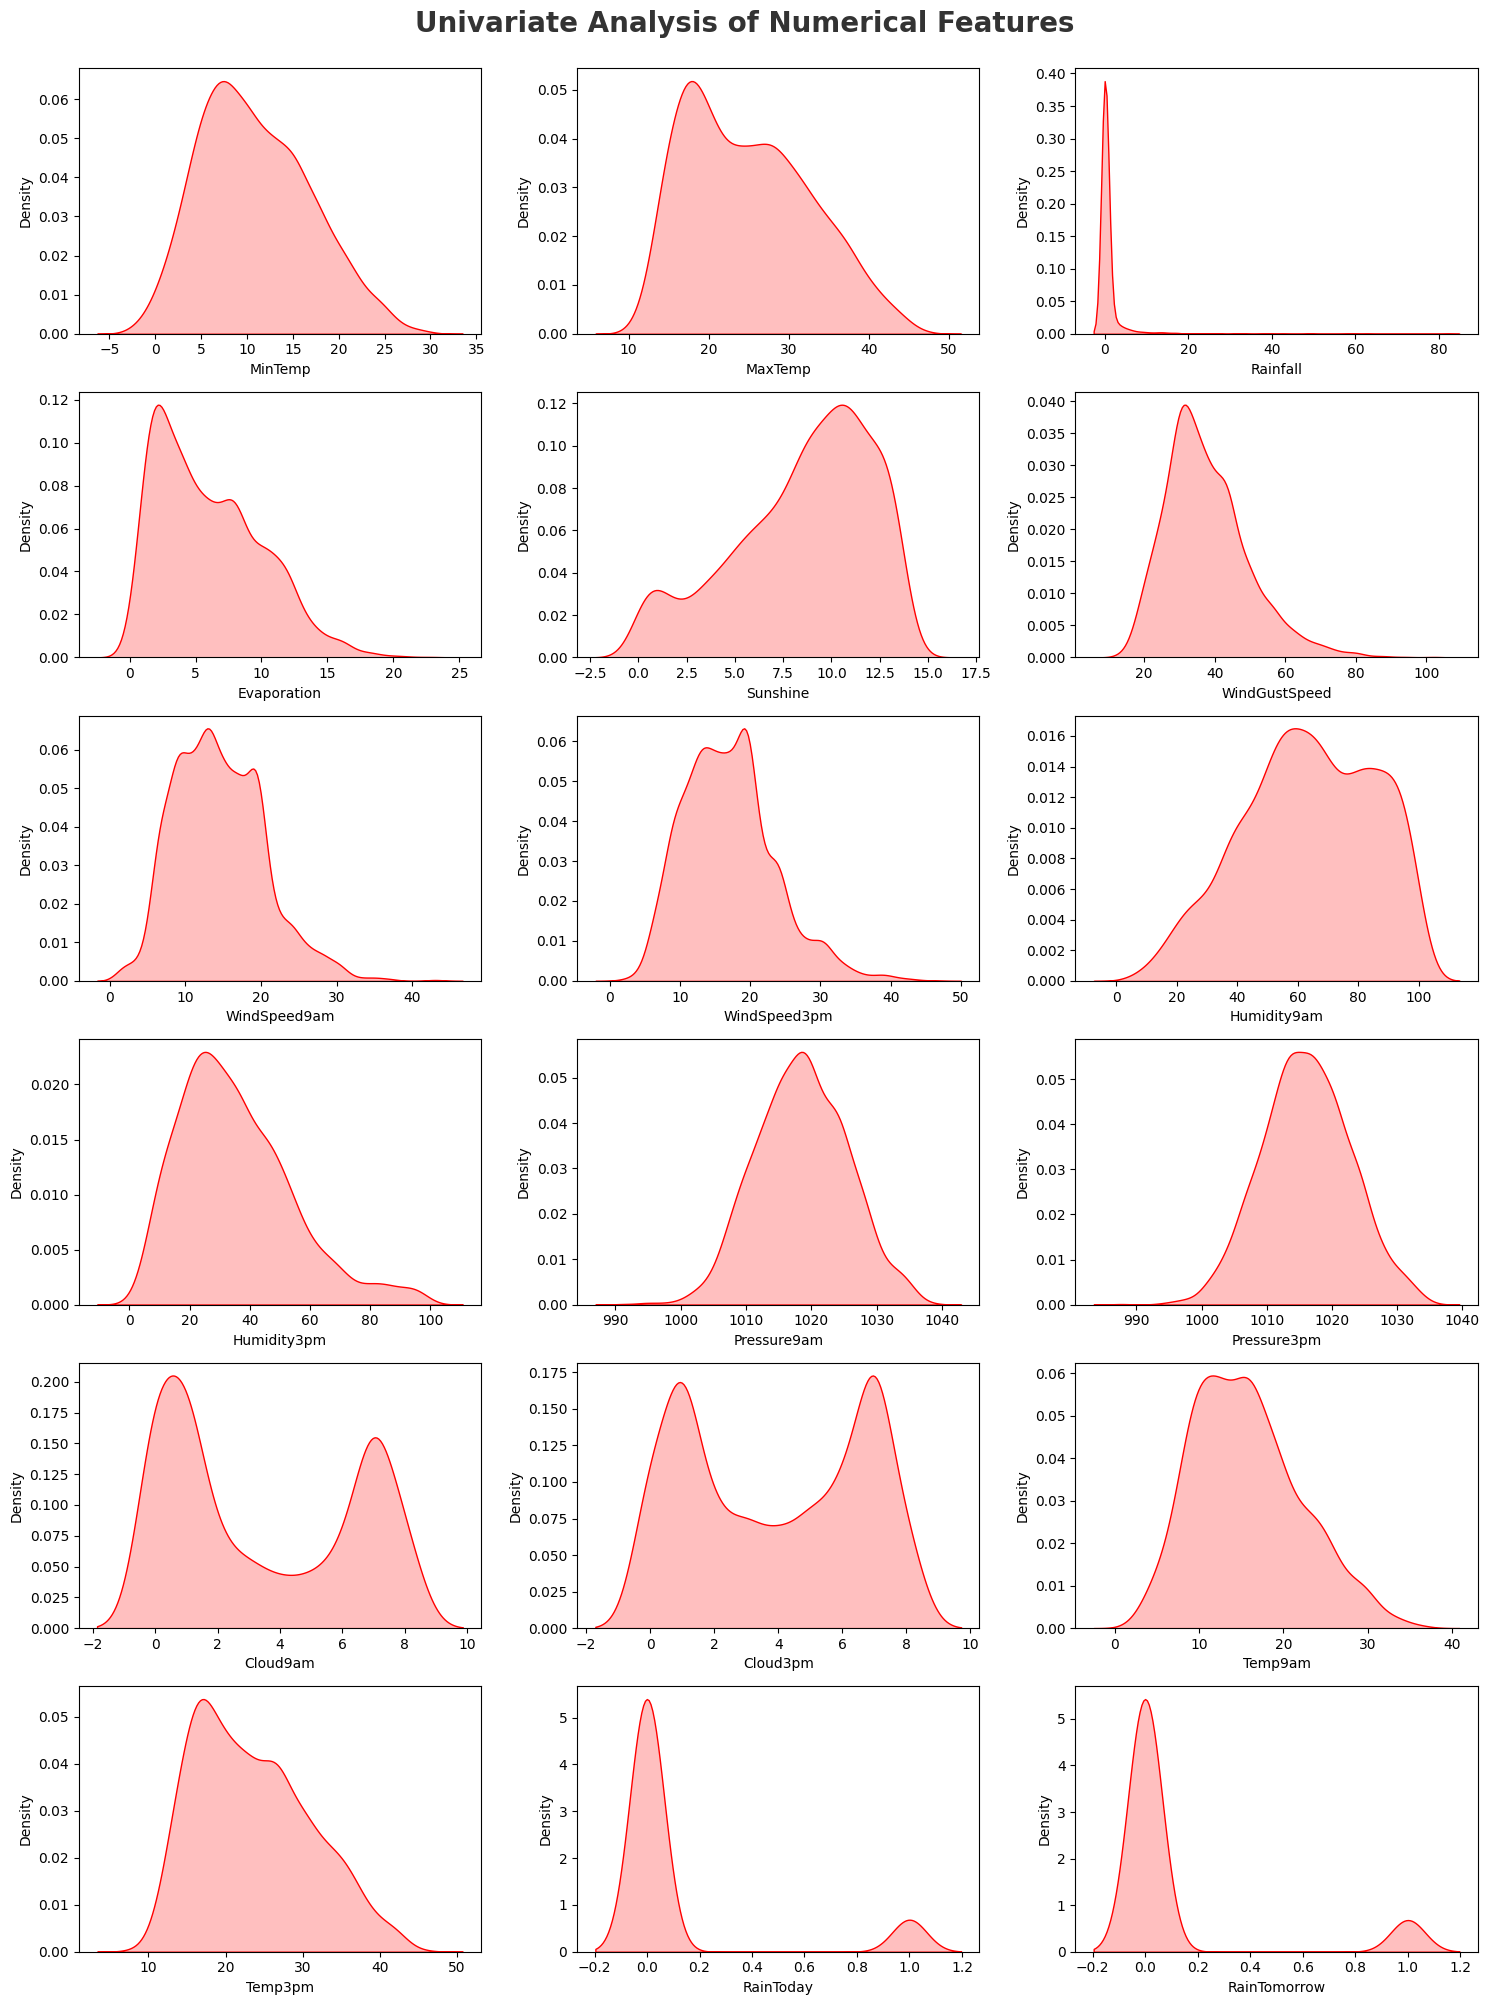

In [31]:
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]], fill=True, color='r', warn_singular=False)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

## Feature Distribution

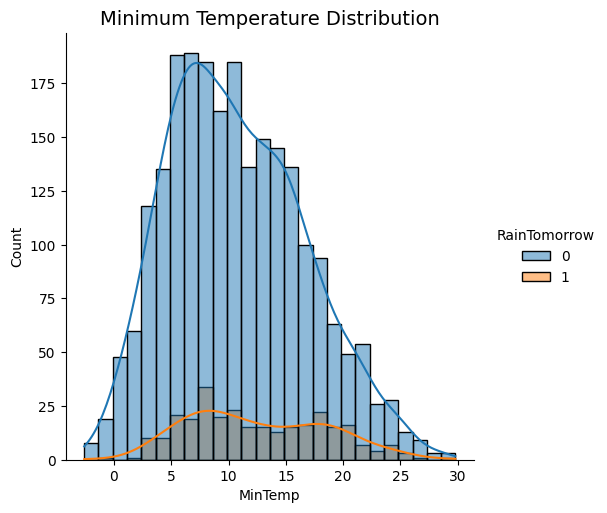

In [32]:
sns.displot(df, x="MinTemp", hue='RainTomorrow', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

Oservation:
During the analysis it has been found that the range of minimum temperature is from -3.5 degree celcius to 29 degree celcius and 6 degree celcius minimum temperature has the highest frequency in the dataset.

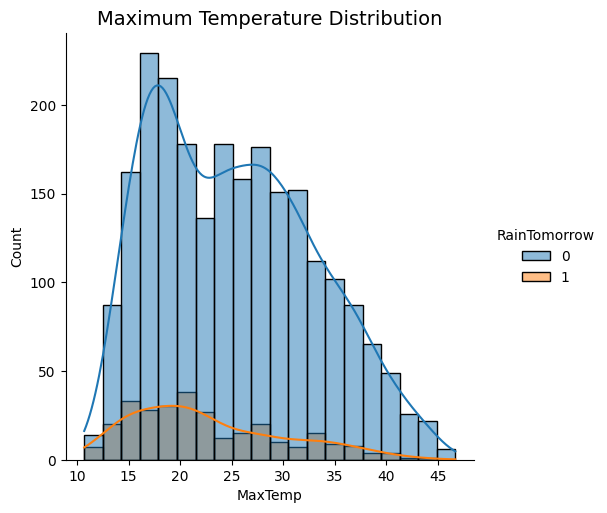

In [33]:
sns.displot(df, x="MaxTemp", hue='RainTomorrow', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

Observation:
On the other hand, the range of maximum temperature is from 11 degree celcius to 47 degree celcius and 17 degree celcius maximum temperature has the highest frequency in the dataset.

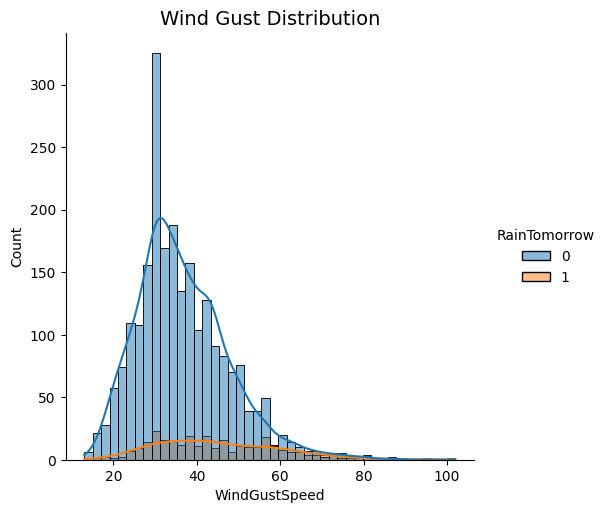

In [34]:
sns.displot(df, x="WindGustSpeed", hue='RainTomorrow', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of strong wind gusts is from 12 compass points to 104 compass points and 30 compass points of wind gusts have the highest frequency in the dataset.

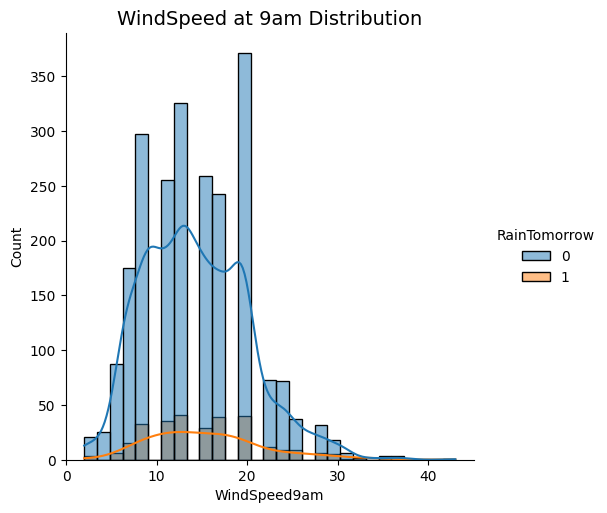

In [35]:
sns.displot(df, x="WindSpeed9am", hue='RainTomorrow', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of wind speed at 9 am is from 3 kmph to 44 kmph and 20 kmph of wind speed has the highest frequency in the dataset.

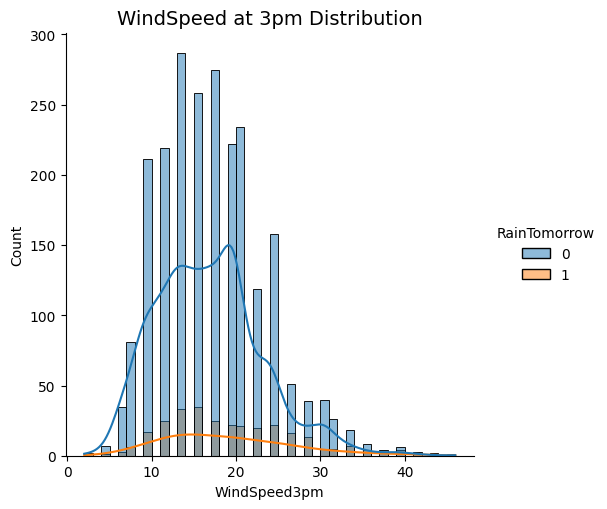

In [36]:
sns.displot(df, x="WindSpeed3pm", hue='RainTomorrow', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

Observation:
On the other hand, the range of wind speed at 3 pm is from 3 kmph to 48 kmph and 14 kmph of wind speed has the highest frequency in the dataset.

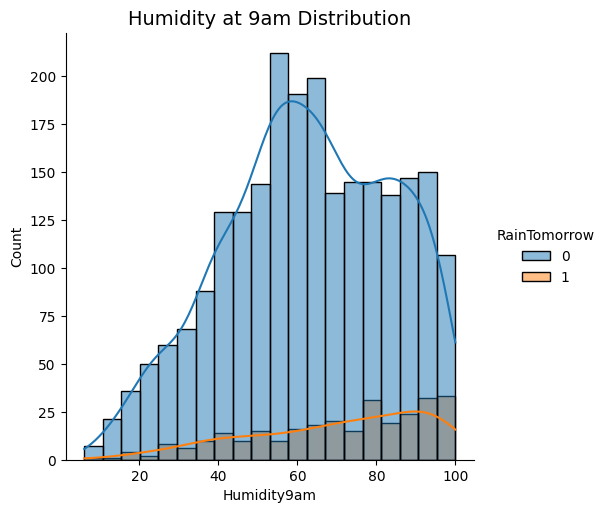

In [37]:
sns.displot(df, x="Humidity9am", hue='RainTomorrow', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of humidity at 9 am is from 10% to 100% and 55% of humidity at 9 am has the highest frequency in the dataset.

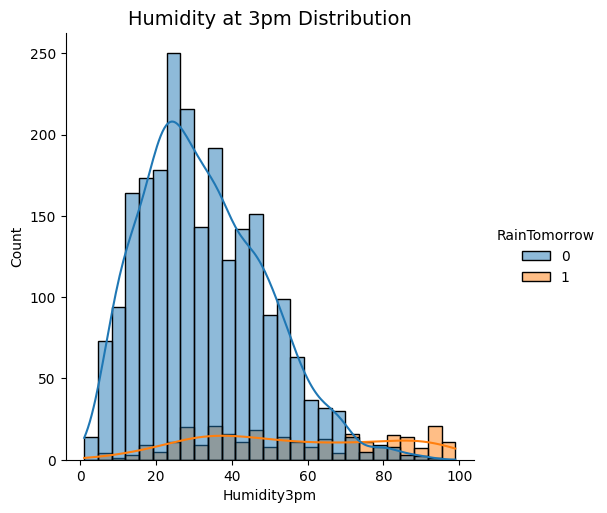

In [38]:
sns.displot(df, x="Humidity3pm", hue='RainTomorrow', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

During the analysis, it has been found that the range is 54.43% of humidity at 3 pm has the highest frequency in the dataset.


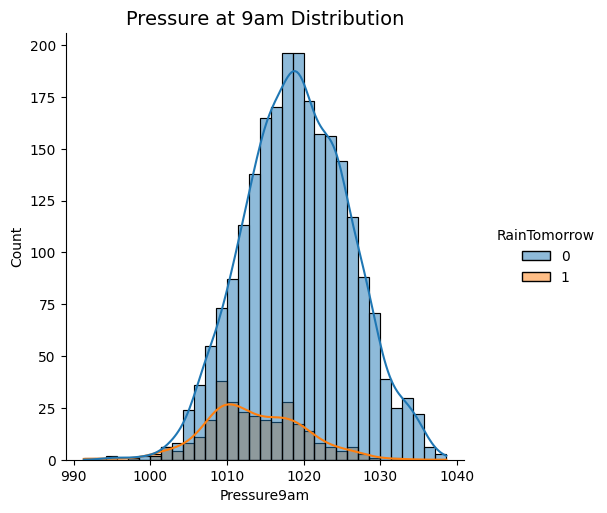

In [39]:
sns.displot(df, x="Pressure9am", hue='RainTomorrow', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of wind pressure at 9 am is from 992.5 hPa to 1038 hPa and 1017.68 hPa of pressure has the highest frequency in the dataset.

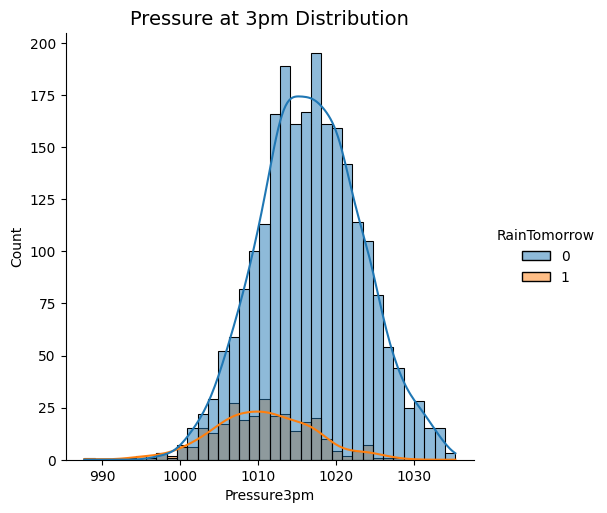

In [40]:
sns.displot(df, x="Pressure3pm", hue='RainTomorrow', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

Observation:
The range of pressure at 3 pm is from 986 hPa to 1038 hPa and 1016 hPa of pressure has the highest frequency in the dataset.

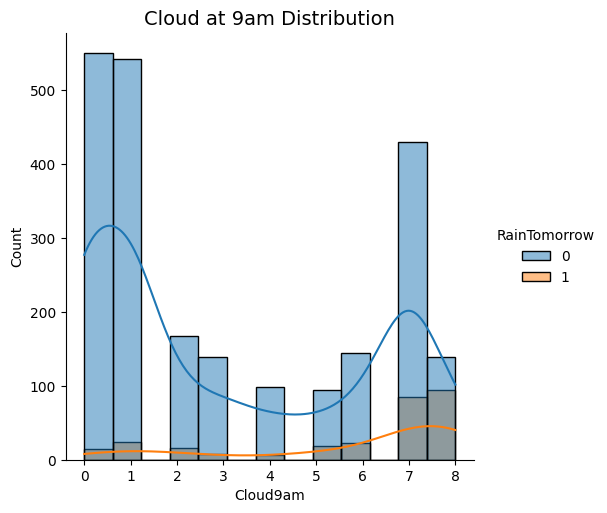

In [41]:
sns.displot(df, x="Cloud9am", hue='RainTomorrow', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of cloud at 9 am is from 0 eighths to 8 eighths and 0eighths of cloud at 9 am has the highest frequency in the dataset.

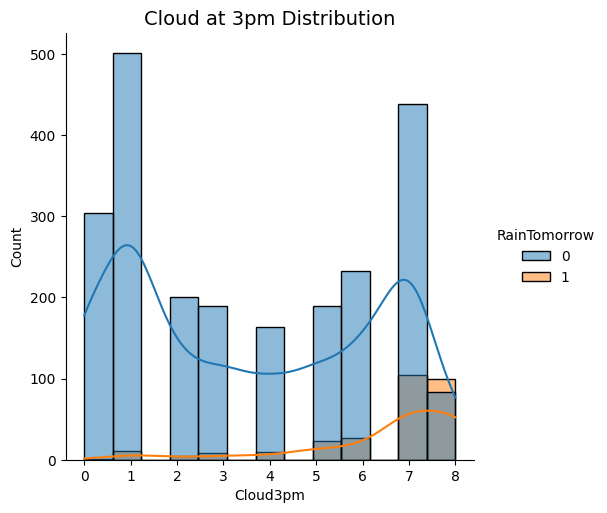

In [42]:
sns.displot(df, x="Cloud3pm", hue='RainTomorrow', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()

Observation:
1 eighths of cloud at 3 pm has the highest frequency in the dataset.

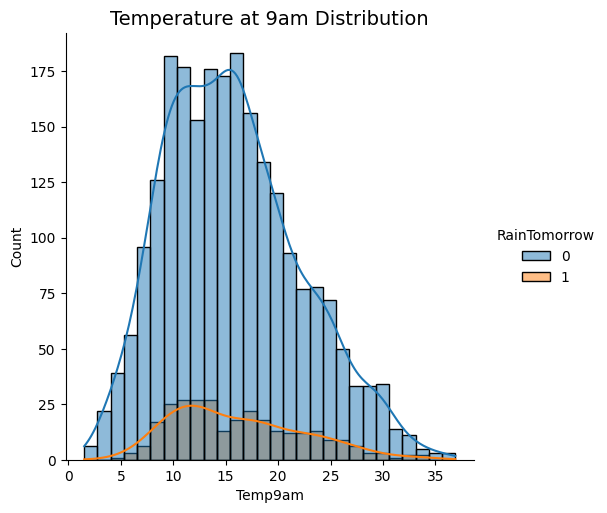

In [43]:
sns.displot(df, x="Temp9am", hue='RainTomorrow', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()

Observation:
During the analysis, it has been found that the range of wind temperature at 9 am is from 2 degree celcius to 36 degree celcius and 16 degree celcius of temperature has the highest frequency in the dataset.

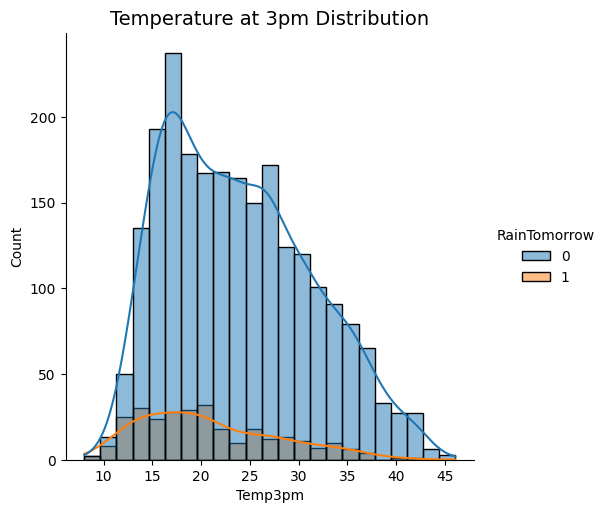

In [44]:
sns.displot(df, x="Temp3pm", hue='RainTomorrow', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()

Observation:
The range of pressure at 3 pm is from 7 degree celcius to 45 degree celcius and 17 degree celcius of temperature has the highest frequency in the dataset.

### Average WindSpeed Analysis

In [45]:
windspeed_weather_df = df.groupby(['Location'])[['WindSpeed9am', 'WindSpeed3pm']].mean()
windspeed_weather_df = windspeed_weather_df.reset_index()
windspeed_weather_df.head()

,Location,WindSpeed9am,WindSpeed3pm
0,Madurai,14.479183,16.994217


### Average Humidity Analysis

In [46]:
humidity_weather_df = df.groupby(['Location'])[['Humidity9am', 'Humidity3pm']].mean()
humidity_weather_df = humidity_weather_df.reset_index()
humidity_weather_df.head()

,Location,Humidity9am,Humidity3pm
0,Madurai,63.552429,35.206631


### Average Pressure Analysis

In [47]:
pressure_weather_df = df.groupby(['Location'])[['Pressure9am', 'Pressure3pm']].mean()
pressure_weather_df = pressure_weather_df.reset_index()
pressure_weather_df.head()

,Location,Pressure9am,Pressure3pm
0,Madurai,1018.516577,1016.037972


### Average Temperature Analysis

In [48]:
location_weather_df = df.groupby(['Location'])[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']].mean()
location_weather_df = location_weather_df.reset_index()
location_weather_df.head()

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm
0,Madurai,10.914225,24.95744,15.70212,23.531187


In [49]:
num_weather_df =df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                                     'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                     'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                                     'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]
num_weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.8,27.4,0.0,9.6,12.6,56.0,17.0,31.0,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,0,0
2,10.6,28.6,0.0,9.2,13.6,30.0,20.0,9.0,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,0,0
3,13.2,34.5,0.0,8.8,13.5,26.0,9.0,17.0,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,0,0
4,16.5,37.3,0.0,10.4,13.4,37.0,11.0,13.0,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,0,0
5,15.7,39.2,0.0,13.4,13.4,37.0,9.0,15.0,34.0,6.0,1011.8,1007.7,0.0,0.0,23.3,37.8,0,0


In [50]:
correlation = df.corr()

C:\Users\91638\AppData\Local\Temp\ipykernel_15096\3853220190.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


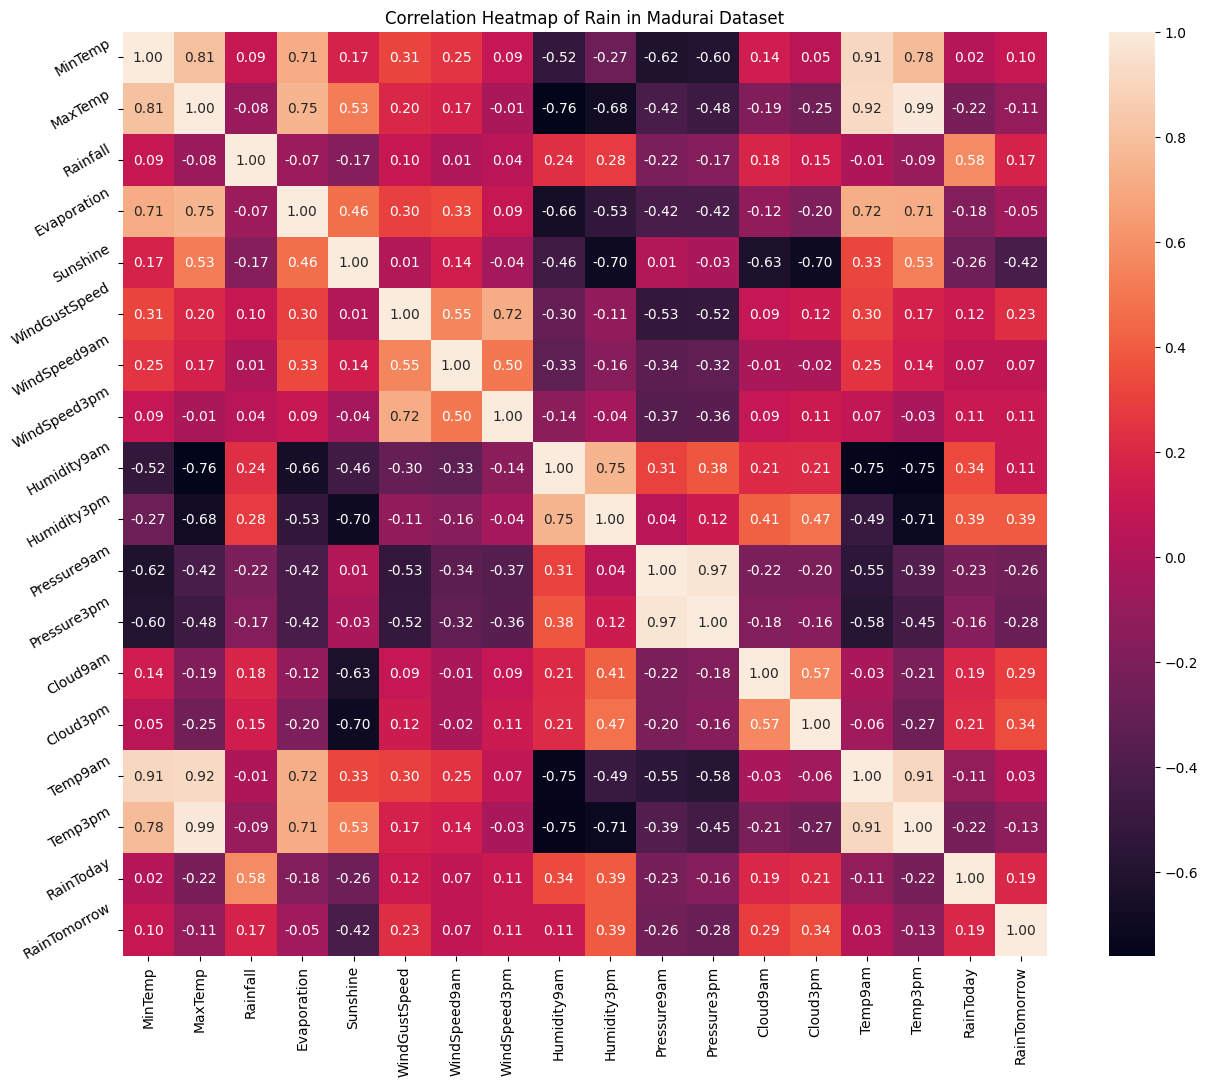

In [51]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Madurai Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

INTERPRETATION 

From the above correlation heat map, we can conclude that :-

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.81).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.78).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.91).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.92).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.99).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.72).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.97).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.91).

C:\Users\91638\AppData\Local\Temp\ipykernel_15096\3353104606.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() > 0.75,


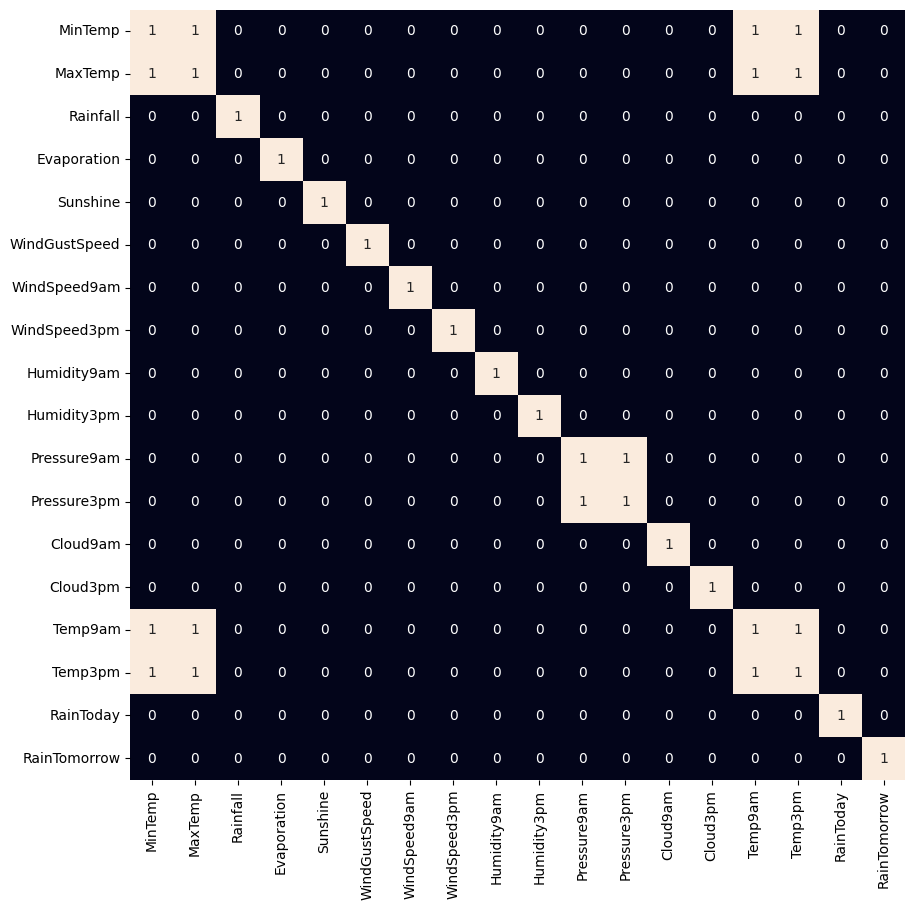

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.75,
           annot=True,
           cbar=False)
plt.show()

In [53]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

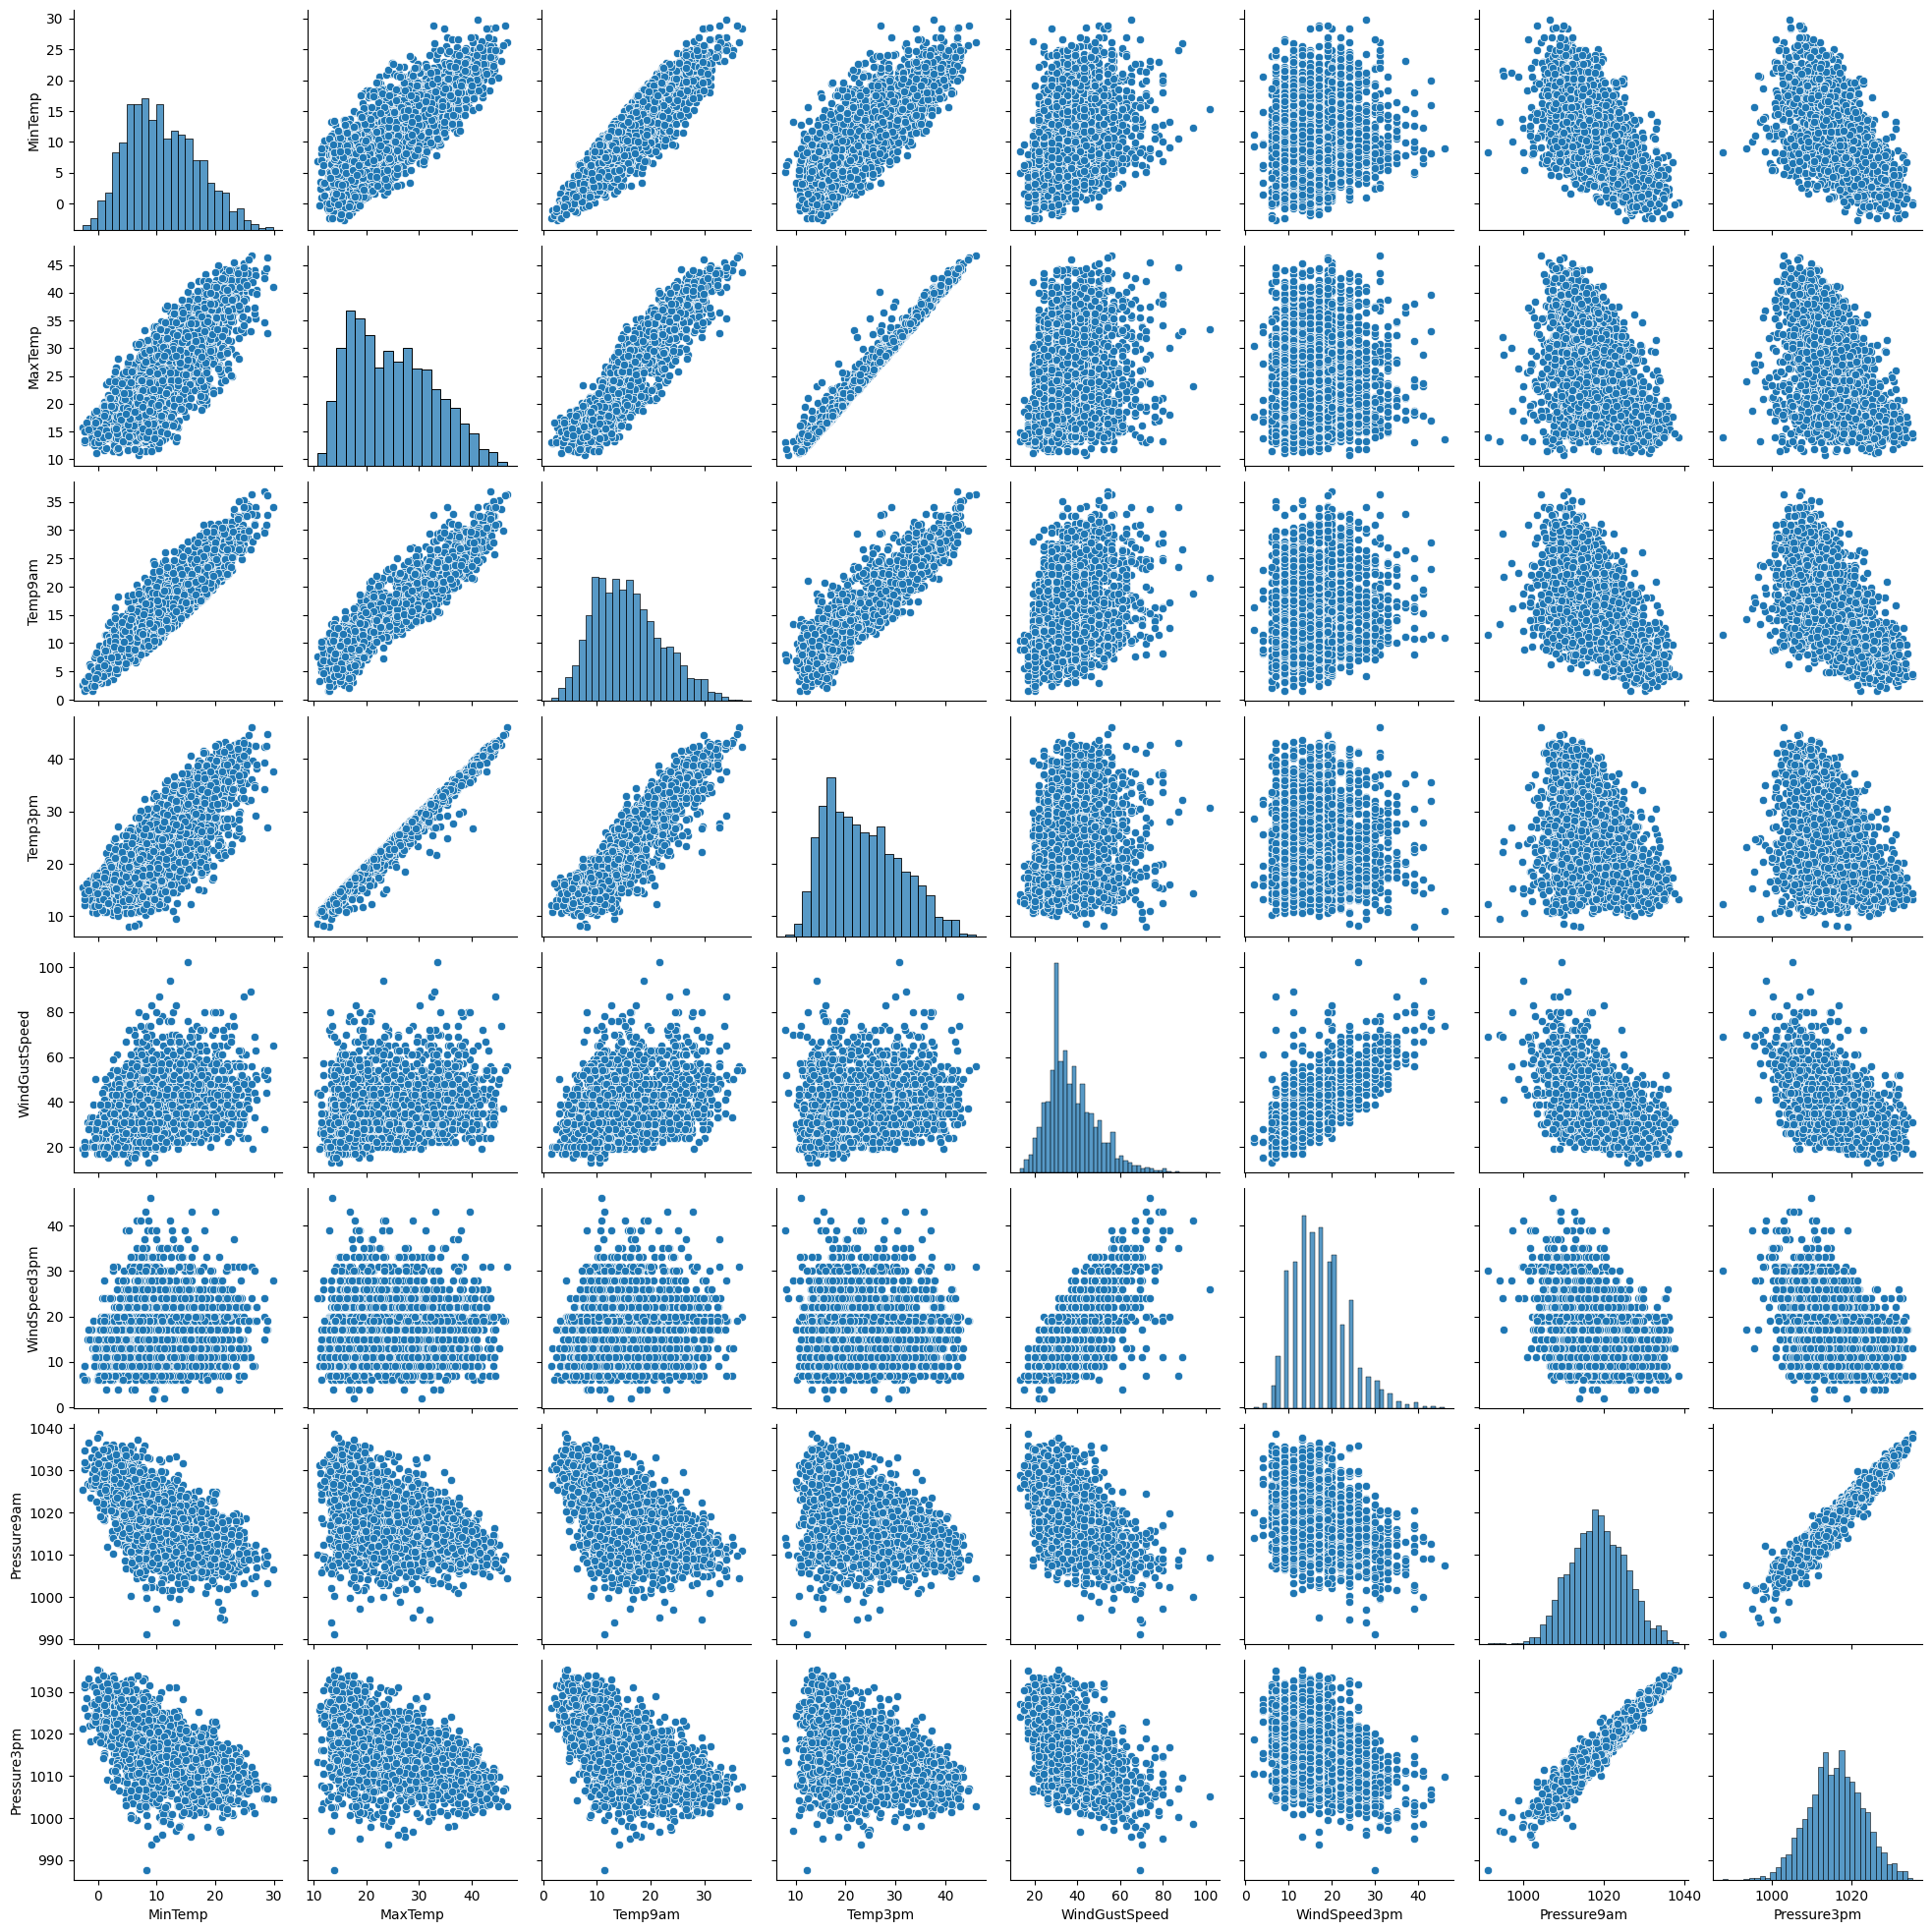

In [54]:
# define extract the variables which are highly positively correlated                                                                       
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist') 
plt.show()

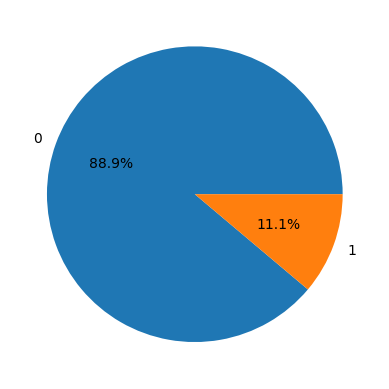

In [55]:
plt.pie(df['RainTomorrow'].value_counts().values,
        labels = df['RainTomorrow'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

We can see that out of the total number of RainTomorrow values, '0' appears 88.7% times and '1' appears 11.3% times.

In [56]:
df.groupby('RainTomorrow').mean()


C:\Users\91638\AppData\Local\Temp\ipykernel_15096\3836084528.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('RainTomorrow').mean()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
RainTomorrow,,,,,,,,,,,,,,,,,
0,10.705900,25.248807,0.675792,6.089414,9.031584,36.690672,14.337093,16.743167,62.732755,32.570933,1019.152408,1016.715835,3.100651,3.565727,15.638612,23.878482,0.091106
1,12.575779,22.633564,3.004498,5.412111,4.293080,45.280277,15.612457,18.996540,70.089965,56.228374,1013.445329,1010.631488,5.820069,6.550173,16.208651,20.761246,0.283737


In [57]:
features = xcol = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday',]

print(features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [60]:
 #Selecting the X variables
xcol = features
X = df[xcol].values

In [61]:
# Scale the X variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [62]:
# Select the Y variable
ycol = ['RainTomorrow']
y = df[ycol].values

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [64]:
#Train the model using Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [65]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [66]:
#df.head(5)

In [67]:
# Make predictions on the test data using Logistic Regression
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [68]:
# Make predictions on the test data using Randommforest
y_pred1 = model1.predict(X_test)
print(y_pred1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [69]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:",accuracy)

Logistic Regression Accuracy: 0.9191270860077022


In [70]:
# Calculate the accuracy of the model
accuracy1 = accuracy_score(y_test, y_pred1)
print("Random Forest Accuracy:",accuracy1)

Random Forest Accuracy: 0.9114249037227214


In [71]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[675  16]
 [ 47  41]]

True Positives(TP) =  675

True Negatives(TN) =  41

False Positives(FP) =  16

False Negatives(FN) =  47


In [72]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred1)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[678  13]
 [ 56  32]]

True Positives(TP) =  678

True Negatives(TN) =  32

False Positives(FP) =  13

False Negatives(FN) =  56


In [73]:
# data = {'IEEE':85, 'Research Gate':79, 'Kaggle':84,
#         'Rpubs':80 , 'Versita':86, 'ChandraMani': 90 }
# courses = list(data.keys())
# values = list(data.values())
  
# fig = plt.figure(figsize = (10, 5))
# c=['red', 'yellow', 'black', 'blue', 'orange','green'] 
# # creating the bar plot
# plt.bar(courses, values, color = c,
#         width = 0.4)
 
# plt.xlabel("Predictors")
# plt.ylabel("Accuracy in Percentage(%)")
# plt.title("Comparing With Others Prediction Accuracy")
# plt.show()

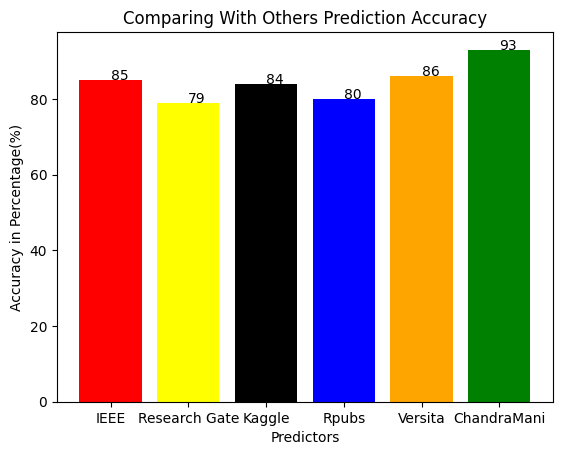

In [74]:

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
 
if __name__ == '__main__':
    data = {'IEEE':85, 'Research Gate':79, 'Kaggle':84,
        'Rpubs':80 , 'Versita':86, 'ChandraMani': 93 }
    x = list(data.keys())
    y = list(data.values())
    # creating data on which bar chart will be plot
    #x = ["Engineering", "Hotel Management", "MBA",
        # "Mass Communication", "BBA", "BSc", "MSc"]
    #y = [9330, 4050, 3030, 5500,         8040, 4560, 6650]
    c=['red', 'yellow', 'black', 'blue', 'orange','green'] 
    # making the bar chart on the data
    plt.bar(x, y, color = c)
     
    # calling the function to add value labels
    addlabels(x, y)
     
    # giving title to the plot
    plt.title("Comparing With Others Prediction Accuracy")
     
    # giving X and Y labels
    plt.xlabel("Predictors")
    plt.ylabel("Accuracy in Percentage(%)")
     
    # visualizing the plot
    plt.show()